In [1]:
from PIL import Image
import numpy as np
import imageio
import matplotlib.pyplot as plt
import random as rnd
import os
import cv2
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from func import *
from IPython.display import display, clear_output

In [2]:
rnd.seed(30)

### Замечание: в данной программе рассматривается только левая часть номера ( без региона)

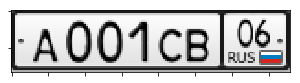

(34, 152, 3)


In [3]:
pic = imageio.imread("A001CB06.png")
plot_image(pic)
print(pic.shape)

## Создание шума и затемнение картинки на примере "A001CB06.png"

Затемненяем картинку, добавляем на нее шум по заданным параметрам.

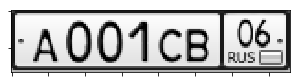

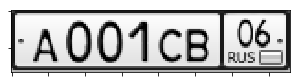

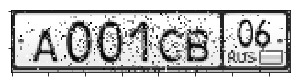

In [9]:
plot_image(pic)
pic = make_picture_gray(pic)
plot_image(pic)

num, pix_x, pix_y, shade = choose_changes_for_picture(pic)
pic1 = change_picture(pic, num, pix_x, pix_y, shade)
plot_image(pic1)

In [10]:
data_nums = []
data_let = []
ans_nums = []
ans_let = []

In [13]:
%%time
path = ""
path = os.path.abspath("")
print(path)
filt1 = np.array([[-0.1,0.2,-0.1], 
                 [0.2,3,0.2], 
                 [-0.1,0.2,-0.1]])

filt3 =np.array([[1,4,60,4,1],
                 [4,16,100,16,4],
                 [6,24,-496,24,6],
                 [4,16,100,16,4],
                 [1,4,60,4,1]])

ra = [16,18,16,16,18,18,22]

/home/ksenia/Загрузки/NUMBERS_CARS-master
CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 1.35 ms


### Процесс затемнения и добавления шума картинки
Аналогично примеру проводим затемнение и добавление шума для каждой картинки в датасете (для каждой картинки свои параметры). Складываем эти затемненнные картинки с шумом в папку "noisy_img_no_counturs". 

### Процесс улучшения качества картинки
При помощи cv2.medianBlur производим сглаживание картинки. В зависимости от средней глубины серого картинки производим наложение фильтров для улучшения качества картинки. Улучшенные картинки складываем в папку cleared_img_no_contours.  

### Выделение контуров букв и цифр
Будем выделять контуры букв и цифр при помощи библиотеки cv2.

### Процесс разделения картинки
Нам нужно разрезать картинку на 6 частей, т.е. сделать 7 разрезов. Первый разрез - самая правая граница контура до 110 пикселя. Остальные 6 разрезов будем искать по следующему принципу: мы имеем массив "ra" - массив примерных расстояний между буквами. Будем делать разрез по самому близкому концу контура к элементу массива.
По 7 разрезам мы получм 6 картинок, сложим их в папку parse_img_no_contours. 


23
T784OC67.png


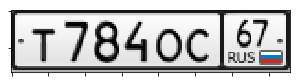

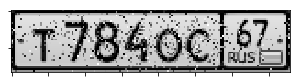

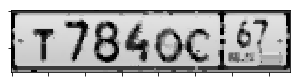

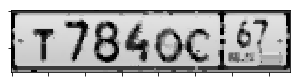

HAHAH


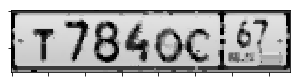

[4, 23, 43, 57, 72, 90, 108]


KeyboardInterrupt: 

In [14]:

iterat = 0
for i in os.listdir(path + "/" + "img"):
    print(i)
    pic = imageio.imread(path + "/" + "img/" + i)
    plot_image(pic)
    pic = make_picture_gray(pic)
    num, pix_x, pix_y, shade = choose_changes_for_picture(pic)
    pic = change_picture(pic, num, pix_x, pix_y, shade)
    pic = pic.astype(np.uint8)
    plot_image(pic)
    imageio.imwrite("noisy_img_no_counturs/" + i, pic)
    
    
    
    
    pic = cv2.medianBlur(pic, 3)
    plot_image(pic)
    if pic[:,:,0].mean() < 255/5:
        pic = cv2.filter2D(pic,-1, filt3)
        pic = 255 - pic
    if (pic[:,:,0].mean() >= 255/5) and (pic[:,:,0].mean() < 255 / 2):
        pic = cv2.filter2D(pic,-1, filt1)
    imageio.imwrite("cleared_img_no_counturs/" + i, pic)
    plot_image(pic)
    
    
    
    
    imgray = cv2.cvtColor(pic,cv2.COLOR_BGR2GRAY)
    ret, thresh = cv2.threshold(imgray, 127, 255, 0)
    asd, contours, hierarchy = cv2.findContours(thresh,cv2.RETR_CCOMP,cv2.CHAIN_APPROX_SIMPLE)
    
    
    
    
    
    pic1 = np.array([255 for i in range(pic.shape[0] * pic.shape[1] * 3)])
    pic1 = pic1.reshape((pic.shape[0] , pic.shape[1] , 3))
    sticks = np.array([])
    for j in range(len(contours)):
        a = np.array(contours[j])
        a = a.reshape((-1,2))
        t = a[:,0].min()
        if t <= 110:
            sticks = np.append(sticks, t)        
        t =a[:,0].max()
        if t <= 110:
            sticks = np.append(sticks, t)    
    plot_image(pic)
    sticks = sticks.astype(int)
    j = 0
    k = sticks.max()
    ar_k = [] 
    
    
    while j < 7:
        ar_k.append(k)
        k = sticks[(np.abs(sticks + max(ra[j], 0) - k)).argmin()] 
        j += 1    
    ar_k = ar_k[::-1]
    print(ar_k)
    pic[:,110] = [0,255,0]
    func = pic[:,:,0].mean(axis=0)
    color = pic.mean()
    mini_pic = np.array([255 for i in range(34*34*3*6)])
    mini_pic = mini_pic.reshape((6,34,34,3))
    mini_pic = mini_pic.astype(int)
    
    for j in range(6):
        mini_pic[j,:,max(0, 34 - (ar_k[j+1] - ar_k[j])):34 ,:] = pic[:,ar_k[j]:ar_k[j+1],:]
        
    imageio.imwrite("parse_img_no_counturs/" + i[:-4] + "_" + "0" +i[-4:], mini_pic[0].astype(np.uint8))
    
    imageio.imwrite("parse_img_no_counturs/" + i[:-4] + "_" + "4" +i[-4:], mini_pic[4].astype(np.uint8))
    
    imageio.imwrite("parse_img_no_counturs/" + i[:-4] + "_" + "5" +i[-4:], mini_pic[5].astype(np.uint8))
    
    
    imageio.imwrite("parse_img_no_counturs/" + i[:-4] + "_" + "1" +i[-4:], mini_pic[1].astype(np.uint8))
    
    imageio.imwrite("parse_img_no_counturs/" + i[:-4] + "_" + "2" +i[-4:], mini_pic[2].astype(np.uint8))
    
    imageio.imwrite("parse_img_no_counturs/" + i[:-4] + "_" + "3" +i[-4:], mini_pic[3].astype(np.uint8))
    plot_image(mini_pic[0])
    print(i)
    clear_output()
    print(iterat)
    iterat += 1
    

## Алгоритм k-ближайших соседей.



Далее запустим алгоритм knn отдельно на буквах и отдельно на цифрах. 


In [6]:
clf_n = KNeighborsClassifier(n_neighbors=7,algorithm="brute")
clf_l = KNeighborsClassifier(n_neighbors=7,algorithm="brute")

In [7]:
path = os.path.abspath("")
itera = 0
data_let = []
data_num = []
ans_let = []
ans_num = []

In [8]:
%%time

for i in os.listdir(path + "/" + "parse_img_no_counturs"):
    #print(i)
    #print(itera)
    #print("#", i[-5:-4])
    pic = imageio.imread(path + "/" + "parse_img_no_counturs/" + i)
    if (int(i[-5:-4]) > 0) and (int(i[-5:-4]) <= 3):
        data_num.append(pic.reshape((-1)))
        ans_num.append(i[int(i[-5:-4])])
    else:
        data_let.append(pic.reshape((-1)))
        ans_let.append(i[int(i[-5:-4])])
    
    itera += 1
    

CPU times: user 11.9 s, sys: 924 ms, total: 12.8 s
Wall time: 12.8 s


In [9]:
X_train_l, X_test_l, y_train_l, y_test_l = train_test_split(data_let, ans_let, test_size=0.3)
X_train_n, X_test_n, y_train_n, y_test_n = train_test_split(data_num, ans_num, test_size=0.3)
len(y_test_n)

9738

In [10]:
%%time
clf_n.fit(X_train_n, y_train_n)
clf_l.fit(X_train_l, y_train_l)

CPU times: user 84.9 ms, sys: 36 ms, total: 121 ms
Wall time: 119 ms


Выведем точность для цифр.

In [11]:
%%time
clf_n.score(X_test_n, y_test_n)

CPU times: user 43.4 s, sys: 1.09 s, total: 44.5 s
Wall time: 14.1 s


0.9799753542821935

Выведем точность для букв.

In [12]:
%%time
clf_l.score(X_test_l, y_test_l)

CPU times: user 54.5 s, sys: 1.28 s, total: 55.8 s
Wall time: 17.4 s


0.9627233518176217